In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [20]:
import pathlib
dataset = "./data/CoLeaf DATASET/CoLeaf DATASET"
data_dir = pathlib.Path(dataset)
boron = list(data_dir.glob('boron-B/*'))
print(boron[0])
#PIL.Image.open(str(roses[0]))

data\CoLeaf DATASET\CoLeaf DATASET\boron-B\boron-B


In [21]:
img_height, img_width = 224, 224
batch_size = 10
epochs = 15
num_classes = 10

data_train = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = batch_size,
    validation_split = False
)

category = data_train.class_names
print(category)


train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
train_ds = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')
#rescale=1./255,
#    shear_range=0.2,
#    zoom_range=0.2,
#    horizontal_flip=True,

Found 1006 files belonging to 10 classes.
['boron-B', 'calcium-Ca', 'healthy', 'iron-Fe', 'magnesium-Mg', 'manganese-Mn', 'more-deficiencies', 'nitrogen-N', 'phosphorus-P', 'potasium-K']
Found 809 images belonging to 10 classes.
Found 197 images belonging to 10 classes.


In [22]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(6):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [23]:
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape=(img_height, img_width, 3))

In [24]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.02)(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [25]:
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
# Traning Model

history = model.fit(
    train_ds,
    validation_data=validation_generator,
    epochs=epochs
)

#

Epoch 1/15


81/81 [==============================] - 144s 2s/step - loss: 2.2052 - accuracy: 0.2151 - val_loss: 2.1698 - val_accuracy: 0.2234
Epoch 2/15
81/81 [==============================] - 132s 2s/step - loss: 2.1159 - accuracy: 0.2336 - val_loss: 2.1041 - val_accuracy: 0.2487
Epoch 3/15
81/81 [==============================] - 136s 2s/step - loss: 2.0890 - accuracy: 0.2756 - val_loss: 2.0644 - val_accuracy: 0.3147
Epoch 4/15
81/81 [==============================] - 141s 2s/step - loss: 2.0426 - accuracy: 0.2954 - val_loss: 2.0495 - val_accuracy: 0.2538
Epoch 5/15
81/81 [==============================] - 151s 2s/step - loss: 2.0081 - accuracy: 0.2868 - val_loss: 2.0213 - val_accuracy: 0.2487
Epoch 6/15
81/81 [==============================] - 130s 2s/step - loss: 1.9895 - accuracy: 0.2954 - val_loss: 2.0428 - val_accuracy: 0.2538
Epoch 7/15
81/81 [==============================] - 135s 2s/step - loss: 1.9578 - accuracy: 0.3103 - val_loss: 2.0241 - val_accuracy: 0.3147
Epoch 8/15


Text(0.5, 1.0, 'Loss')

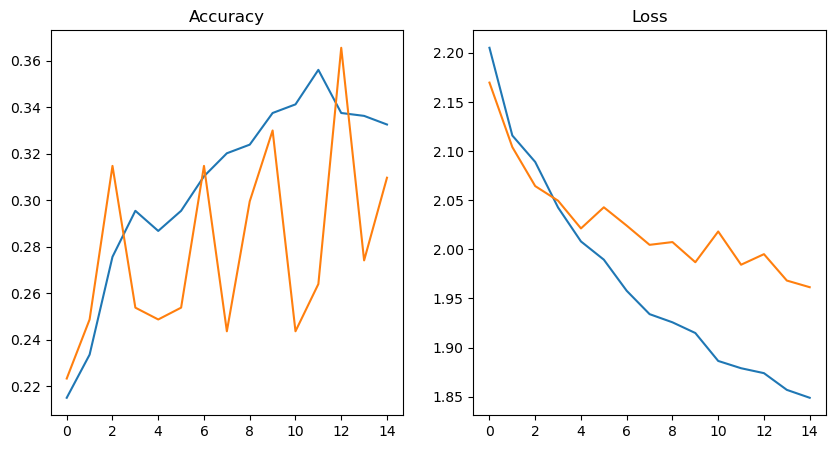

In [27]:
# resnet_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# resnet_model.summary()

# epochs=10
# history = resnet_model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )

epochs_range = range(15)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')

In [28]:
image = r"D:\uni\366\assignment3\data\CoLeaf DATASET\CoLeaf DATASET\healthy\healthy\Healthy (3).jpg"
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_batch = tf.expand_dims(img_arr,0)

In [29]:
import numpy as np
predict = model.predict(img_batch)
score = tf.nn.softmax(predict)
print('This is {} with accuracy of {:0.2f}'.format(category[np.argmax(score)], np.max(score)*100))

1/1 [==============================] - 1s 1s/step
This is boron-B with accuracy of 21.76


In [30]:
model.save('RN50_CoLeaf.keras')